<a href="https://colab.research.google.com/github/JVSumedha/OASIS-INFOBYTE/blob/main/Oasis_Infobyte_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1 - EDA ON RETAIL SALES DATA**

**IMPORTING DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/archive (3).zip')

In [ ]:
df

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


**DATA PREPROCESSING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [ ]:
df.shape

(937, 4)

In [ ]:
df.size

3748

In [ ]:
df.describe()

,venda,estoque,preco
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


In [ ]:
df.columns

Index(['data', 'venda', 'estoque', 'preco'], dtype='object')

In [ ]:
df.isnull().sum()

,0
data,0
venda,0
estoque,0
preco,0


In [ ]:
#df.drop(['data'],axis=1,inplace=True)

In [ ]:
#df

In [ ]:
#standard scaling
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#new_df=scaler.fit_transform(df)
#new_df

In [ ]:
df['data'] = pd.to_datetime(df['data'])

In [ ]:
df = df.sort_values(by='data')

In [ ]:
df.set_index('data', inplace=True)

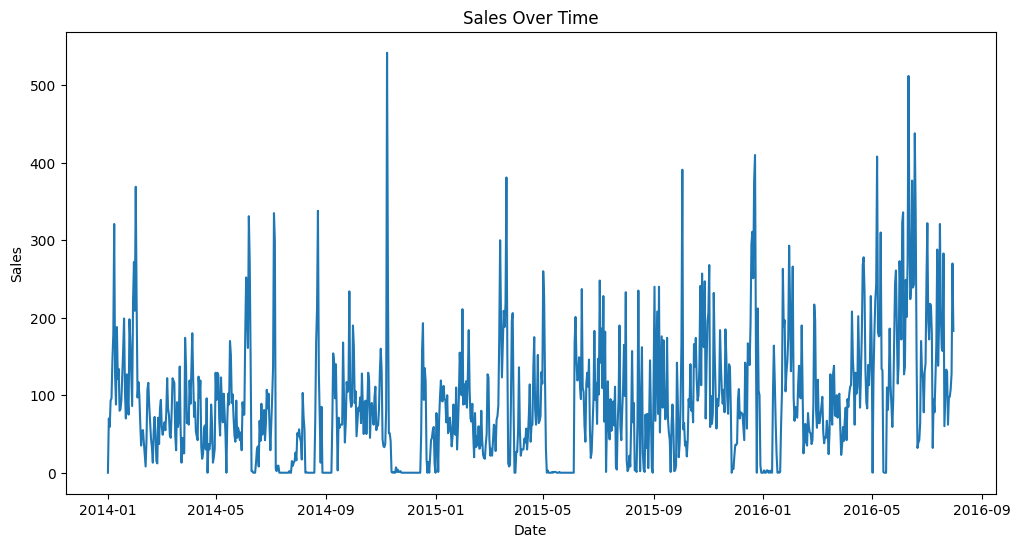

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='venda', data=df)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


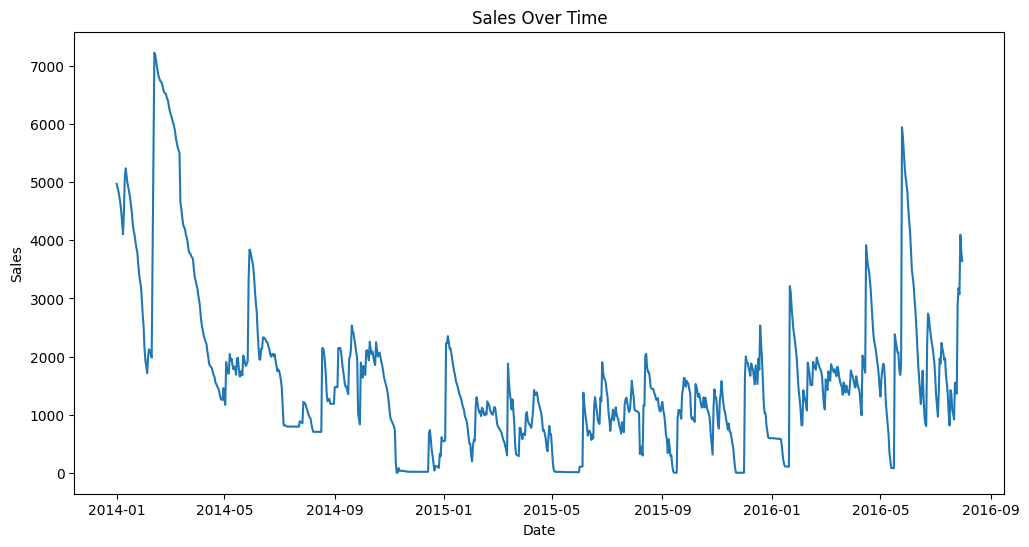

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='estoque', data=df)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


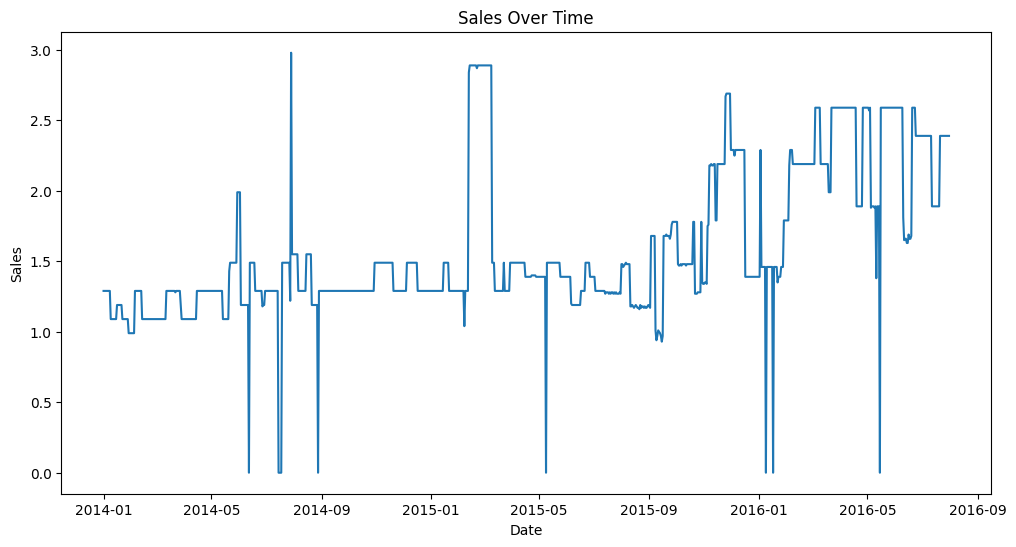

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='preco', data=df)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

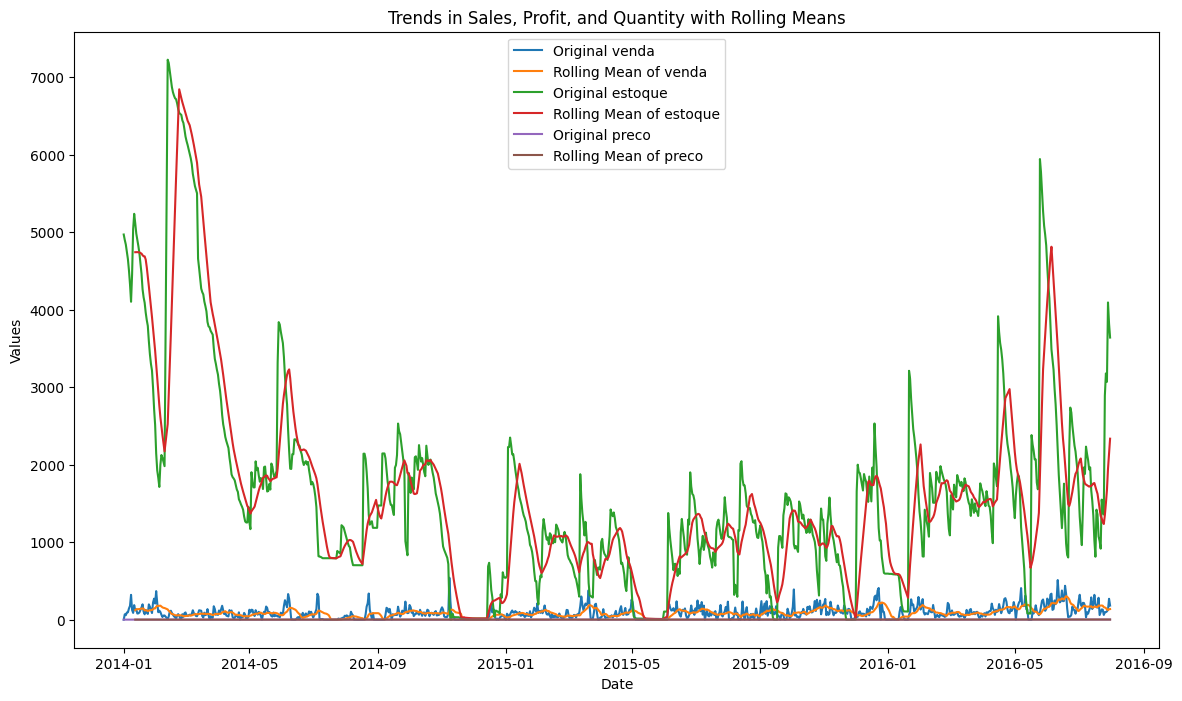

In [ ]:
variables = ['venda', 'estoque', 'preco']

# Calculate the rolling mean for each variable (you can adjust the window size)
for var in variables:
    df[f'{var}_Rolling_Mean'] = df[var].rolling(window=12).mean()

# Plotting the original values and their rolling means
plt.figure(figsize=(14, 8))

for var in variables:
    plt.plot(df[var], label=f'Original {var}')
    plt.plot(df[f'{var}_Rolling_Mean'], label=f'Rolling Mean of {var}')

plt.title('Trends in Sales, Profit, and Quantity with Rolling Means')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

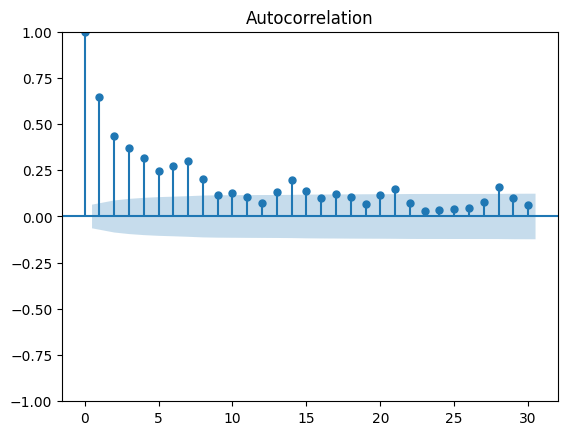

<Figure size 1200x600 with 0 Axes>

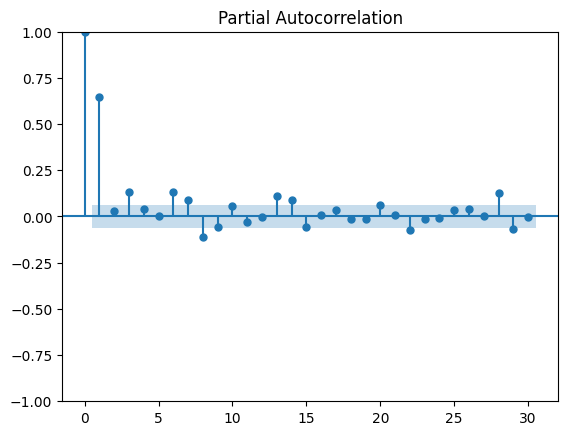

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(df['venda'], lags=30)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['venda'], lags=30)
plt.show()


<Figure size 1200x600 with 0 Axes>

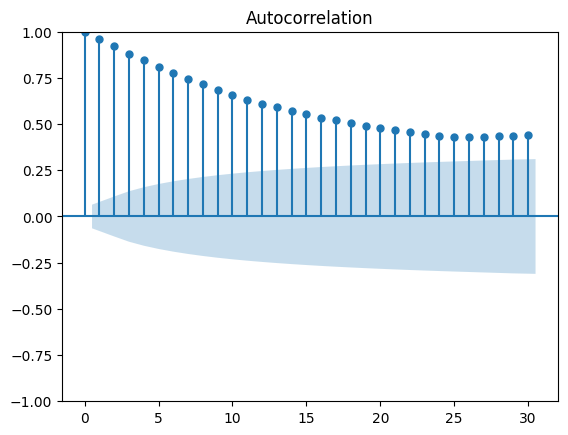

<Figure size 1200x600 with 0 Axes>

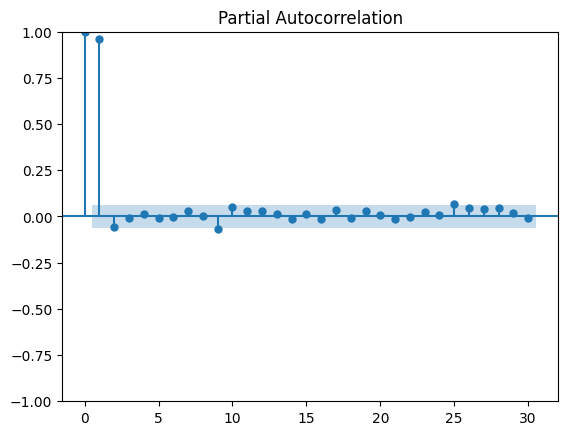

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(df['estoque'], lags=30)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['estoque'], lags=30)
plt.show()

<Figure size 1200x600 with 0 Axes>

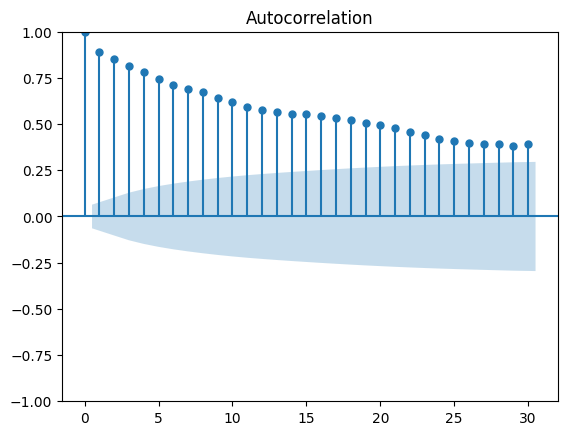

<Figure size 1200x600 with 0 Axes>

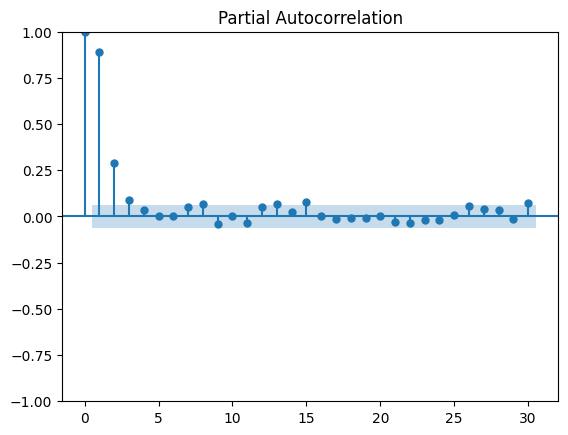

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(df['preco'], lags=30)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['preco'], lags=30)
plt.show()

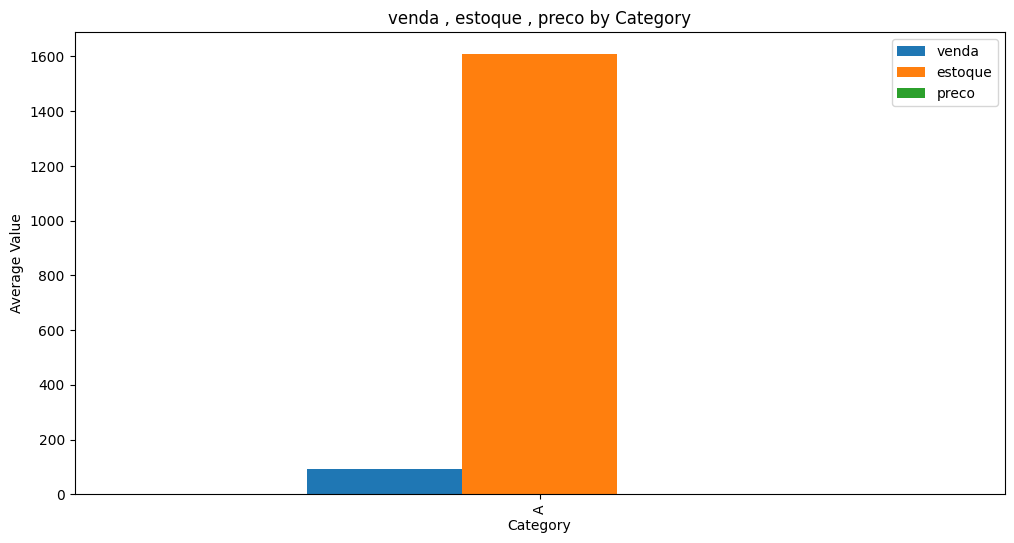

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Verify if 'Category' column exists, if not, create a dummy one for this example.
if 'Category' not in df.columns:
    df['Category'] = 'A' # Creating a dummy category for demonstration

# Calculate mean values by category
category_means = df.groupby('Category').agg({
    'venda': 'mean',
    'estoque': 'mean',
    'preco': 'mean',
}).reset_index()

# Plotting
category_means.plot(kind='bar', x='Category', figsize=(12, 6))
plt.title('venda , estoque , preco by Category')
plt.ylabel('Average Value')
plt.show()

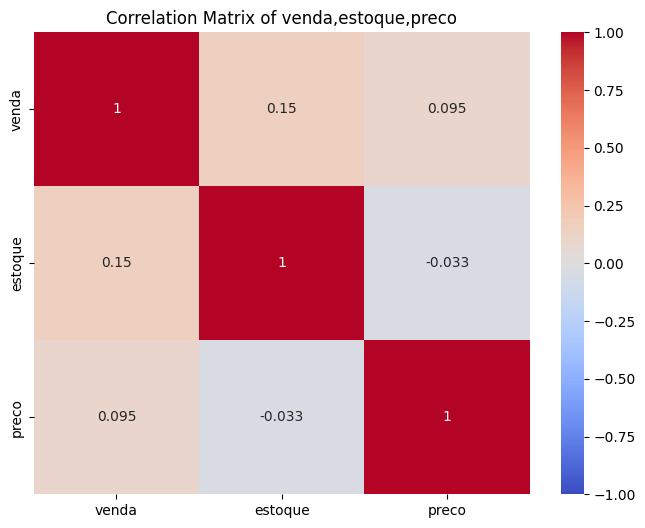

In [ ]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[['venda' , 'estoque' , 'preco']].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of venda,estoque,preco')
plt.show()
